# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Bruno Arruda Camargo Paulino Costa </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [44]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [45]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [46]:
df.loc[(df.Latitude>0),"Hemisfério"] = "Norte"
df.loc[(df.Latitude<0),"Hemisfério"] = "Sul"

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

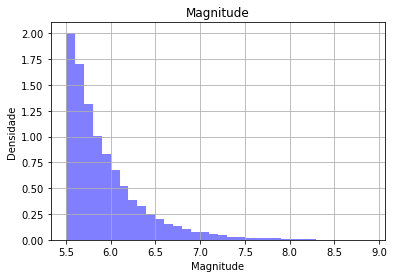

In [47]:
faixa=np.arange(5.5,9,0.1)
plot = df.Magnitude.plot.hist(bins=faixa,title='Magnitude', normed=1, alpha=0.5,color="blue",sharex=True, sharey=True)
plt.ylabel('Densidade')
plt.xlabel('Magnitude')
plt.grid()

###### Quanto maior a Magnitude, mais difícil de ocorrer é o terremoto.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [72]:
mu=df["Magnitude"].mean()
sigma=df["Magnitude"].std()
print(mu)
print(sigma)

5.882530753460003
0.4230656393157772


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

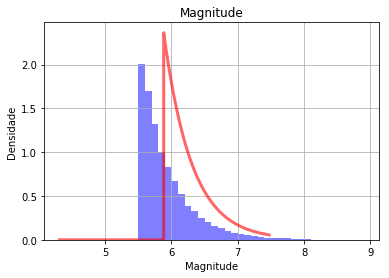

In [93]:
x=sorted(stats.norm.rvs(size=10000, loc=mu, scale=sigma))
faixa=np.arange(5.5,9,0.1)
plot = df.Magnitude.plot.hist(bins=faixa,title='Magnitude', normed=1, alpha=0.5,color="blue",sharex=True, sharey=True,histtype='stepfilled')
plt.ylabel('Densidade')
plt.xlabel('Magnitude')
plt.grid()
plt.plot(x, expon.pdf(x, loc=mu, scale=sigma), lw=3, alpha=0.6, color="red")

###### O fit faz com que a média seja o pico da exponencial (5.88) e decaia de acordo com seu desvio padrão de 0.42.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [67]:
yt=pd.crosstab(df.Type, df.Hemisfério, margins=True, rownames=['Types'], colnames=['Hemisférios'], normalize="index")*100
yt=yt.round(decimals=1)
yt

Hemisférios,Norte,Sul
Types,,
Earthquake,45.1,54.9
Explosion,50.0,50.0
Nuclear Explosion,84.0,16.0
Rock Burst,0.0,100.0
All,45.4,54.6


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

###### 45.4% de chance.

Explique o seu raciocínio

###### Na tabela a linha All indica a porcentagem total de terremotos em cada hemisfério, na coluna Norte a porcentagem é 45.4%.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [15]:
xt=pd.crosstab(df.Hemisfério, df.Type, margins=True, rownames=['Types'], colnames=['Hemisférios'], normalize="index")*100
xt=xt.round(decimals=1)
xt

Hemisférios,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Types,,,,
Norte,98.6,0.0,1.4,0.0
Sul,99.8,0.0,0.2,0.0
All,99.2,0.0,0.7,0.0


###### Na tabela a linha Coluna Nuclear Explosion indica a porcentagem de terremotos desse tipo em cada hemisfério, na linha Norte a porcentagem é 1.4%.

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

###### * A probabilidade de ter sido `Nuclear Explosion` é 1.4%.

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

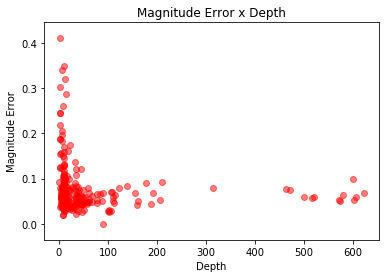

In [36]:
df.rename(columns={"Magnitude Error":"MagError"},inplace=True)

todos = plt.scatter(x=df.Depth,y=df.MagError,c="red",alpha=0.5)
plt.ylabel('Magnitude Error')
plt.xlabel('Depth')
plt.title("Magnitude Error x Depth")
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [62]:
df.corr(method="pearson", min_periods=1)


,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
Latitude,1.000000,0.203546,-0.081020,0.007080,0.433815,0.034987,0.113208,0.315075,0.050794,-0.396768,0.015625,-0.214762
Longitude,0.203546,1.000000,-0.085861,0.020552,0.015924,0.038579,-0.214609,0.148510,-0.233097,-0.131313,-0.093827,-0.028061
Depth,-0.081020,-0.085861,1.000000,-0.074609,0.174663,0.023457,-0.076918,-0.015254,-0.171162,-0.073832,-0.016467,-0.134002
Depth Error,0.007080,0.020552,-0.074609,1.000000,-0.320579,-0.135880,0.618254,-0.093292,0.357704,-0.077423,0.644593,0.094398
Depth Seismic Stations,0.433815,0.015924,0.174663,-0.320579,1.000000,0.440582,-0.385993,0.813374,-0.420556,0.056619,-0.214959,-0.158620
Magnitude,0.034987,0.038579,0.023457,-0.135880,0.440582,1.000000,0.135573,-0.003972,-0.233579,-0.092609,-0.078406,0.075865
Magnitude Error,0.113208,-0.214609,-0.076918,0.618254,-0.385993,0.135573,1.000000,-0.334062,0.567411,-0.076744,0.617721,0.032616
Magnitude Seismic Stations,0.315075,0.148510,-0.015254,-0.093292,0.813374,-0.003972,-0.334062,1.000000,-0.334864,-0.117606,-0.093143,-0.167473
Azimuthal Gap,0.050794,-0.233097,-0.171162,0.357704,-0.420556,-0.233579,0.567411,-0.334864,1.000000,-0.033482,0.396450,-0.056217
Horizontal Distance,-0.396768,-0.131313,-0.073832,-0.077423,0.056619,-0.092609,-0.076744,-0.117606,-0.033482,1.000000,0.126877,0.035778


Explique o que significa o valor da correlação calculada acima? 

###### O valor quer dizer que há uma correlação negativa de 7% entre Magnitude Error e Depth, ou seja, a cada 1 Magnitude Error que aumenta, a Depth cai em 0.07.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [89]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [90]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

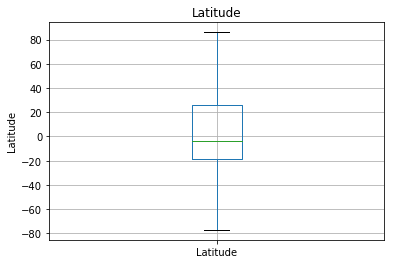

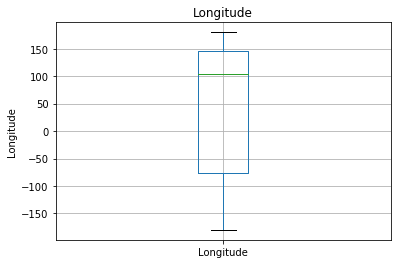

In [27]:
plot = df.Latitude.plot(kind="box")
plt.ylabel('Latitude')
plt.title("Latitude")
plt.grid()
plt.show()

plot = df.Longitude.plot(kind="box")
plt.ylabel('Longitude')
plt.title("Longitude")
plt.grid()
plt.show()

###### Nos boxplots a linha verde determina a média das latitudes e longitudes onde ocorreram mais terremotos. Pela média de latitude, pode-se dizer que o número de terremotos é bem distribuído entre os dois hemisférios, uma vez que a média está bem próxima de 0º, ou seja, o Equador. Não obstante, é razoável dizer que estes abalos estão concentrados entre os 20º e os -20º, uma vez que a caixa (que representa 50% de todos terremotos) está disposta sobre esses ângulos. Por outro lado, na longitude é possível afirmar que a distribuição é mais concentrada no hemisfério oriental por uma grande margem, visto que a caixa esta disposta entre 150º leste e apenas 75º oeste; Além disso, essa conclusão é apoiada pelo fato da média de todos os terremotos estar aproximadamente no meridiano que cruza a Indochina, China, Mongólia e Rússia, países localizados ao leste do globo terrestre.   

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [68]:
yt

Hemisférios,Norte,Sul
Types,,
Earthquake,45.1,54.9
Explosion,50.0,50.0
Nuclear Explosion,84.0,16.0
Rock Burst,0.0,100.0
All,45.4,54.6


In [69]:
df.rename(columns={"Magnitude Type":"MagType"},inplace=True)

zt=pd.crosstab(df.MagType, df.Hemisfério, margins=True, rownames=['MagTypes'], colnames=['Hemisférios'], normalize="index")*100
zt=zt.round(decimals=1)
zt

Hemisférios,Norte,Sul
MagTypes,,
MB,44.8,55.2
MD,100.0,0.0
MH,100.0,0.0
ML,100.0,0.0
MS,45.0,55.0
MW,47.7,52.3
MWB,45.2,54.8
MWC,42.1,57.9
MWR,46.2,53.8


In [71]:
chance_N=0.84*0.448
chance_S=0.16*0.552
print(chance_N*100)
print(chance_S*100)
if chance_N>chance_S:
    print("É mais provável que tenha sido no Norte!")
if chance_N<chance_S:
    print("É mais provável que tenha sido no Sul!")

37.632
8.832
É mais provável que tenha sido no Norte!
